In [6]:
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future

import gym
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def get_action(s, w):
  return 1 if s.dot(w) > 0 else 0

In [8]:
def play_one_episode(env, params, render=False):
  observation = env.reset()
  done = False
  t = 0

  while not done and t < 10000:
    if(render):
        env.render()
    t += 1
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    if done:
      break

  return t

In [9]:
def play_multiple_episodes(env, T, params, render=False):
  episode_lengths = np.empty(T)

  for i in range(T):
    episode_lengths[i] = play_one_episode(env, params, render)

  avg_length = episode_lengths.mean()
  print("avg length:", avg_length)
  return avg_length

In [10]:
def random_search(env):
  episode_lengths = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1
    avg_length = play_multiple_episodes(env, 100, new_params)
    episode_lengths.append(avg_length)

    if avg_length > best:
      params = new_params
      best = avg_length
  return episode_lengths, params

avg length: 46.34
avg length: 48.18
avg length: 9.77
avg length: 9.69
avg length: 100.98
avg length: 193.66
avg length: 9.67
avg length: 34.23
avg length: 9.43
avg length: 9.36
avg length: 166.14
avg length: 9.21
avg length: 9.76
avg length: 20.17
avg length: 56.75
avg length: 185.8
avg length: 200.0
avg length: 8.89
avg length: 63.3
avg length: 9.69
avg length: 9.47
avg length: 47.01
avg length: 9.06
avg length: 9.54
avg length: 9.36
avg length: 9.38
avg length: 22.64
avg length: 9.19
avg length: 8.98
avg length: 9.54
avg length: 9.28
avg length: 9.7
avg length: 57.55
avg length: 9.23
avg length: 9.72
avg length: 9.35
avg length: 154.43
avg length: 9.75
avg length: 108.19
avg length: 9.31
avg length: 9.1
avg length: 9.67
avg length: 9.09
avg length: 9.03
avg length: 81.74
avg length: 38.32
avg length: 84.5
avg length: 113.8
avg length: 9.23
avg length: 111.52
avg length: 200.0
avg length: 76.62
avg length: 83.95
avg length: 137.85
avg length: 200.0
avg length: 26.74
avg length: 146.51

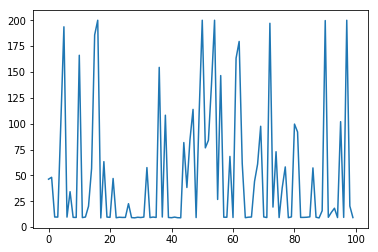

***Final run with final weights***


In [ ]:
env = gym.make('CartPole-v0')
episode_lengths, params = random_search(env)
plt.plot(episode_lengths)
plt.show()

# play a final set of episodes
print("***Final run with final weights***")
play_multiple_episodes(env, 100, params, True)